# Анимация с помощью библиотеки Matplotlib

В библиотеке Matplotlib для создания анимации поддерживается две возможности:
* с помощью класса FuncAnimation - анимация на основе функции
* с помощью класса ArtistAnimation - покадровая анимация.

Подключим нужные для работы библиотеки.

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

## Анимация с помощью FuncAnimation

Для работы с классом FuncAnimation его нужно подключить с помощью директивы import.

In [2]:
from matplotlib.animation import FuncAnimation

Среди основных параметров, которые потребуются при работе с экземплярами класса FuncAnimation:
* fig - рисунок, на котором отображается анимация
* func - функция для обновления кадров анимации
* frames - источник данных для меняющихся кадров анимации
* init_func - функция для создания начального кадра, не является обязательной
* interval - задержка между кадрами в мс
* blit - True или False - для использования двойной буферизации
* repeat - True, если нужно зацикливать анимацию, и False в противоположном случае.

### Анимация в декартовых координатах

Сделаем с помощью FuncAnimation анимацию синусоиды - графика функции sin(x).

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')

width, height = 12, 6
fig = plt.figure(figsize = (width, height))
ax = plt.axes()

xdata, ydata = [], []
ln, = ax.plot([], [], 'r',  linestyle = ':')
frames = np.linspace(-2*np.pi, 2*np.pi, 256)

# Функция init() создает начальный кадр анимации
def init():
    ax.set_xlim(-2*np.pi, 2*np.pi)
    ax.set_ylim(-1.2, 1.2)
    return ln,

# Функция update() обновляет кадры анимации
def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

# Создание анимации с помощью FuncAnimation
ani = FuncAnimation(fig, update, frames = frames, init_func=init, interval = 25,  blit=True)

# Эта строка нужна для отображения созданной анимации в Colab
rc('animation', html='jshtml')

# Запуск анимации в Colab
ani

Output hidden; open in https://colab.research.google.com to view.

### Анимация в полярных координатах

В полярной системе координат каждая точка определяется двумя числами - полярным углом и полярным радиусом.

Создадим анимацию линии в полярной системе координат.

In [7]:
width, height = 7, 7
fig = plt.figure(figsize=(width, height))
ax = plt.axes(projection='polar')

xdata, ydata = [], []
ln, = plt.plot([], [], 'b')

start, stop, step = 0, 7, 200
frames = np.linspace(start, stop, step)

# Функция init() создает начальный кадр анимации
def init():
    ax.set_ylim(0, stop+1)
    return ln,

# Функция update() обновляет кадры анимации
def update(frame):
    ydata.append(frame)
    xdata.append(2*np.pi * frame)
    ln.set_data(xdata, ydata)

    return ln,

mpl.rcParams['animation.embed_limit'] = 24 * 1024 * 1024

# Создание анимации с помощью FuncAnimation
ani = FuncAnimation(fig, update, frames = frames,
                    init_func = init, blit = True, repeat=False, interval=25)

# Эта строка нужна для отображения созданной анимации в Colab
rc('animation', html='jshtml')

# Запуск анимации в Colab
ani

Output hidden; open in https://colab.research.google.com to view.

## Анимация с помощью ArtistAnimation

В этом случае анимация создается на основе подготовленной коллекции кадров.

Среди основных параметров, которые потребуются при работе с экземплярами класса ArtistAnimation:
* fig - рисунок, на котором отображается анимация
* frames - коллекция кадров для анимации
* interval - задержка между кадрами в мс
* blit - True или False - для использования двойной буферизации
* repeat - True, если нужно зацикливать анимацию, и False в противоположном случае.

Для работы с классом ArtistAnimation его нужно подключить с помощью директивы import.

In [9]:
from matplotlib.animation import ArtistAnimation

In [10]:
width, height = 10, 6
fig = plt.figure(figsize = (width, height))
ax = plt.axes(projection='3d')
ax.view_init(30, 60)

# Создание массивов данных для осей x и y
x = np.arange(-2*np.pi, 2*np.pi, 0.4)
y = np.arange(-2*np.pi, 2*np.pi, 0.4)
# Создание массивов данных для координатных сеток в 3D
xgrid, ygrid = np.meshgrid(x, y)

phasa = np.arange(0, 2*np.pi, 0.2)
frames = []

# Цикл для формирования перечня кадров анимации
for p in phasa:
    zgrid = np.sin(xgrid) * np.sin(ygrid+p) / (xgrid * ygrid)
    # Построение очередного графика для записи в перечень кадров
    line = ax.plot_surface(xgrid, ygrid, zgrid, color='b')
    # Пополнение перечня кадров очередным кадром
    frames.append([line])

# Создание анимации с помощью ArtistAnimation
animation = ArtistAnimation(
    fig,                # фигура, где отображается анимация
    frames,             # кадры
    interval=30,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)        # нужно ли зацикливать анимацию

# Эта строка нужна для отображения созданной анимации в Colab
rc('animation', html='jshtml')

# Запуск анимациии в Colab
animation

Output hidden; open in https://colab.research.google.com to view.

## Работа с видеофайлами

Существует много форматов для сохранения видеоконтента. Вот некоторые из них:
* MP4 - поддерживает аудио и видео, часть стандарта MPEG-4
* AVI - Audio Video Interleave, «чередование аудио и видео» - широко используется в Microsoft Windows
* MOV - поддерживает аудио и видео, стандарт для macOS от Apple Inc.

Некотороые характеристики видеосигнала:

* количество кадров в секунду, частота кадров, fps - чем больше частота кадров, тем более плавным для глаза будет выглядеть движение в кадре; мимнимальный показатель для восприятия движения однородным ~ 16 кадров в секунду (16 fps или 16 Гц)
* скорость видеопотока, битрейт, bit rate - количество обрабатываемых бит информации за секунду; как правило, чем больше ширина видеоптока, тем лучше качество видео.

### Запись в видеофайл с помощью FFMpegWriter

Чтобы записывать видеофайлы формата mp4, можно воспользоваться классом FFMpegWriter из библиотеки Matplotlib.

Для использования класса FFMpegWriter его нужно подключить инструкцией import.

In [11]:
from matplotlib.animation import FFMpegWriter

С помощью FuncAnimation создадим график функции y = x*sin(x)

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

width, height = 12, 6
fig = plt.figure(figsize = (width, height))
ax = plt.axes()

xdata, ydata = [], []
ln, = ax.plot([], [], 'r', linestyle = ':')
frames = np.linspace(-10*np.pi, 10*np.pi, 256)

# Функция init() создает начальный кадр анимации
def init():
    ax.set_xlim(-10*np.pi, 10*np.pi)
    ax.set_ylim(-11*np.pi, 11*np.pi)
    return ln,

# Функция update() обновляет кадры анимации
def update(frame):
    xdata.append(frame)
    ydata.append(frame*np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

# Создание анимации с помощью FuncAnimation
ani = FuncAnimation(fig, update, frames = frames, init_func=init, interval = 25,  blit=True)

Запишем полученную анимацию с помощью функции save() в видеофайл:
* формата MP4
* с частотой (fps) = 15 кадров в секунду
* и скоростью записи (bitrate) = 1800.

In [13]:
filename_mp4 = 'xsinx_movie.mp4'
writer = FFMpegWriter(fps=15, bitrate=1800)
ani.save(filename_mp4, writer=writer)

### Воспроизведение видеоформата MP4 в Colab

Для воспроизведения видеофайла формата MP4 воспользуемся функцией HTML из модуля Display библиотеки IPython.

In [14]:
# Подключим функцию HTML с помощью инструкции import
from IPython.display import HTML
from base64 import b64encode
mp4 = open(filename_mp4,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Работа с GIF-файлами

### Сохранение анимации в GIF-файлах

Чтобы записывать файлы формата GIF, можно воспользоваться классом PillowWriter из библиотеки Matplotlib.

Для использования класса PilloeWriter его нужно подключить инструкцией import.

In [15]:
from matplotlib.animation import PillowWriter

С помощью FuncAnimation создадим анимацию для графика функции y = sqrt(x)

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

width, height = 12, 6
fig = plt.figure(figsize = (12, 6))
axis = plt.axes(xlim=(0, 100),  ylim=(0, 10))
title = fig.suptitle('График функции y = sqrt(x)', fontsize=14)

x, y = [], []

line, = axis.plot(0, 0, 'r', linestyle = ':')

# Функция animate() обновляет кадры анимации
def animate(frame_number):
    x.append(frame_number)
    y.append(np.sqrt(frame_number))
    line.set_xdata(x)
    line.set_ydata(y)
    return line,

# Создание анимации с помощью FuncAnimation
ani = FuncAnimation(fig, animate, frames=100,
                               interval=50, blit=True)

Запишем полученную анимацию с помощью функции save() в файл:
* формата GIF
* с частотой (fps) = 15 кадров в секунду
* и скоростью записи (bitrate) = 1800.

In [17]:
filename_gif = 'sqrt_movie.gif'
writer = PillowWriter(fps=15, metadata=None, codec=None, bitrate=1800)
ani.save(filename_gif, writer=writer)

### Отображение GIF-файлов в Colab

GIF-файлы в Colab можно отображать с помощью функции Image из модуля Display библиотеки IPython.

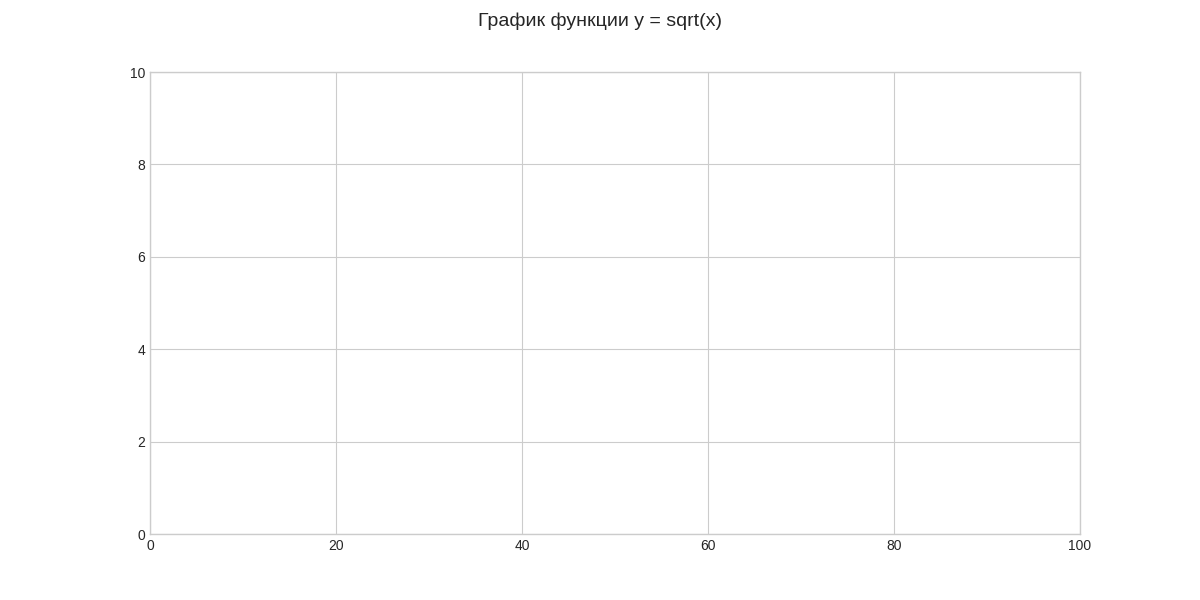

In [18]:
# Подключим функцию Image с помощью инструкции import
from IPython.display import Image

# Воспроизведем GIF-файл с помощью функции Image
Image(open(filename_gif,'rb').read())

## Пример анимации: полярная роза

Создадим анимацию для графика "полярная роза" в полярной системе координат и сохраним ее в GIF-файле.

In [ ]:
width, height = 6, 6
fig = plt.figure(figsize=(width, height))
ax = plt.axes(projection='polar')

# Определим число лепестков для полярной розы
k = 5

xdata, ydata = [], []
ln, = plt.plot([], [], 'r')

# Зададим полный угол поворота и число кадров анимации
start, stop, step = 0, 2*np.pi, 500
frames = np.linspace(start, stop, step)

# Функция для начального кадра
def init():
    ax.set_ylim(0, 1.1)
    return ln,

# Функция для обновления кадров анимации
def update(frame):
    xdata.append(frame)
    ydata.append(np.cos(k * frame))
    ln.set_data(xdata, ydata)
    return ln,

# Создадим анимацию с помощью FuncAnimation
ani = FuncAnimation(fig, update, frames = frames,
                    init_func = init, blit = True, repeat=False, interval=10)

# Сохраним анимацию в GIF-файле
filename_gif = 'polar_rose.gif'
writer = PillowWriter(fps=15, metadata=None, codec=None, bitrate=1800)
ani.save(filename_gif, writer=writer)

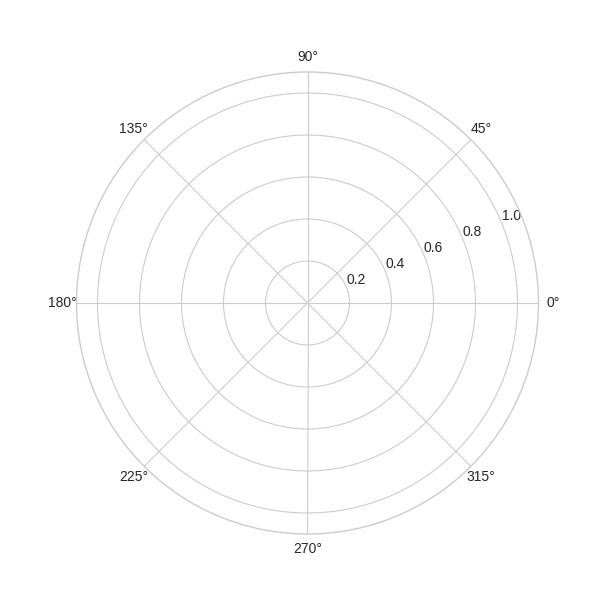

In [20]:
# Подключим функцию Image с помощью инструкции import
from IPython.display import Image

# Воспроизведем GIF-файл с помощью функции Image
Image(open(filename_gif,'rb').read())

## Пример анимации: аттрактор Лоренца

Траектории движения точек с разными начальными координатами как бы притягиваются к некоторой области.

По английски "притягивать" - attract, поэтому получаемая фигура называется аттрактор Лоренца по имени профессора метеорологии Эдварда Лоренца, который его впервые нашел.

В программе создания анимации для аттрактора Лоренца можно задавать количество  наблюдаемых траекторий точек.

При этом все траектории отображаются разными цветами.

Также в анимации используется эффект плавного поворота угла зрения на получаемую картинку.

Создадим анимацию аттрактора Лоренца для 5 траекторий частиц и сохраним ее в видеофайл формата MP4.

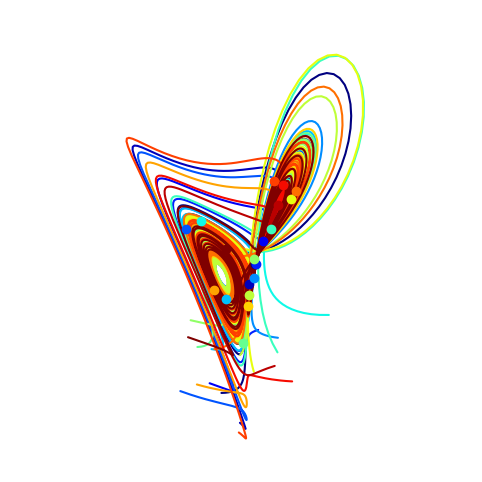

In [21]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib.colors import cnames
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Количество траекторий
N_trajectories = 20

def lorentz_deriv(params, t0, sigma=10., beta=8./3, rho=28.0):
    x, y, z = params
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Выбор начальных точек случайным образом в диапазоне от -15 до +15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Задание набора значений для временной шкалы
t = np.linspace(0, 12, 2000)

# Получение решений для траекторий точек
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Создание картинки и осей для анимации
width, height = 8, 6
fig = plt.figure(figsize = (width, height))
ax = plt.axes(projection='3d')
ax.axis('off')

# Выбор разных цветов для разных траекторий
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# Начальные устанановки для линий и точек
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# Границы диапазонов для очей x, y, z
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# Начальные значения для углов обзора 3D графика
ax.view_init(30, 0)

# Функция для создания начального кадра
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# Функция для создания чередующихся кадров анимации
def animate(i):
    # Два временных интервала для одного кадра
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T

        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# Создание анимации с помощью FuncAnimation
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

# Запись анимации в видеофайл формата mp4
filename_mp4 = 'lorenz_movie.mp4'
writer = FFMpegWriter(fps=15, bitrate=1800)
anim.save(filename_mp4, writer=writer)

Воспроизведем полученный видеофайл.

In [22]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open(filename_mp4,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

# Упражнения

## Упражнение 1

Создать анимацию для графика функции y = x**2 с помощью класса FuncAnimation.

Запустить созданную анимацию в блокноте в среде Colab.

In [23]:
# Подключаем все нужные библиотеки и модули
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

С помощью FuncAnimation создадим анимацию для графика функции y = x**2

In [25]:
plt.style.use('seaborn-v0_8-whitegrid')

width, height = 12, 6
fig = plt.figure(figsize = (width, height))
axis = plt.axes(xlim=(0, 100),  ylim=(0, 10000))
title = fig.suptitle('График функции y = x**2', fontsize=14)

x, y = [], []

line, = axis.plot(0, 0, 'r', linestyle = ':')

# Функция animate() обновляет кадры анимации
def animate(frame_number):
    x.append(frame_number)
    y.append(frame_number**2)
    line.set_xdata(x)
    line.set_ydata(y)
    return line,

# Создаем анимацию с помощью FuncAnimation
ani = FuncAnimation(fig, animate, frames=100,
                               interval=50, blit=True)

# Эта строка нужна для отображения созданной анимации в Colab
rc('animation', html='jshtml')

# Запускаем анимацию в блокноте
ani

Output hidden; open in https://colab.research.google.com to view.

## Упражнение 2

Создать анимацию для графика функции y = sqrt(x)*cos(x) с помощью класса FuncAnimation.

Сохранить анимацию в файле формата GIF.

Воспроизвести созданный GIF-файл в блокноте.

In [26]:
# Подключаем все нужные библиотеки и модули
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

С помощью FuncAnimation создадим анимацию для графика функции y = sqrt(x)*cos(x)

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

width, height = 12, 6
fig = plt.figure(figsize = (width, height))
ax = plt.axes()

xdata, ydata = [], []
ln, = ax.plot([], [], 'r', linestyle = ':')
frames = np.linspace(0, 30*np.pi, 256)

# Функция init() создает начальный кадр анимации
def init():
    ax.set_xlim(0, 30*np.pi)
    ax.set_ylim(-11, 11)
    return ln,

# Функция update() обновляет кадры анимации
def update(frame):
    xdata.append(frame)
    ydata.append(np.sqrt(frame)*np.cos(frame))
    ln.set_data(xdata, ydata)
    return ln,

# Создадим анимацию с помощью FuncAnimation
ani = FuncAnimation(fig, update, frames = frames, init_func=init, interval = 25,  blit=True)

Сохраняем анимацию в файле формата GIF.

In [28]:
filename_gif = 'sqrt_cos.gif'
writer = PillowWriter(fps=15, metadata=None, codec=None, bitrate=1800)
ani.save(filename_gif, writer=writer)

Воспроизводим созданный GIF-файл в блокноте.

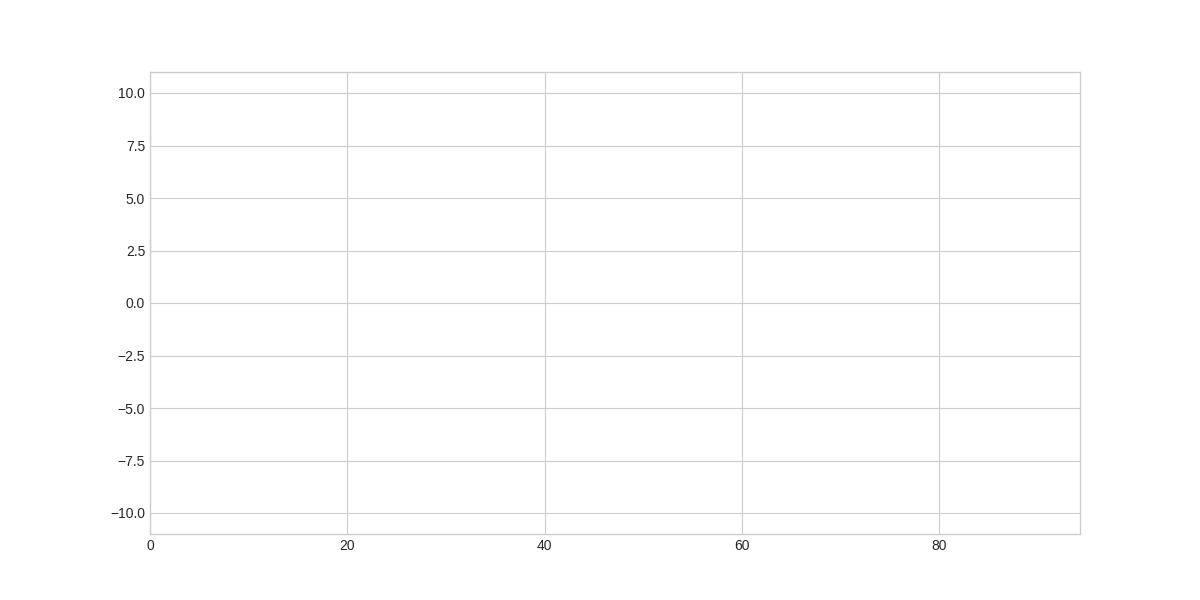

In [29]:
# Подключим функцию Image с помощью инструкции import
from IPython.display import Image

# Воспроизведем GIF-файл с помощью функции Image
Image(open(filename_gif,'rb').read())